<a href="https://colab.research.google.com/github/Modinat-A/CE888/blob/main/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
df = df.iloc[: , 1:]
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
arr = df.values
print(arr.shape)

(24983, 100)


In [ ]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [ ]:
df = df.replace(99.00, np.NaN)
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Best and Worst rated jokes

In [ ]:
avg_ratings = df.mean(axis=0)
print('Best rated is joke', avg_ratings.idxmax(),'with rating',avg_ratings.max())
print('Worst rated is joke', avg_ratings.idxmin(),'with rating',avg_ratings.min())

Best rated is joke 50 with rating 3.6650848950824937
Worst rated is joke 58 with rating -3.8338796373689923


In [ ]:
# Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99.
# This is your validation set. Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(np.nan(arr))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, idx = replace(arr, 0.1)

TypeError: ignored

In [ ]:
idx

(array([12518, 11510,  3769, ..., 22249,  6051,  1802]),
 array([85, 64, 82, ..., 75, 34, 89]))

In [ ]:
arr[idx[0][0], idx[1][0]]

8.93

In [ ]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if  rating != 99.00 and not np.isnan(rating) :
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [ ]:
# Use latent factor modeling (with 2 latent factors) to infer the hidden ratings of the users (they are labeled as "99" in the dataset) on the training set.
# You will have to modify at least one line in the provided sgd() function for this (and probably 2, depending on your variable names).
# You can interrupt at any point the execution of this function, because the values are updated in each iteration, so if you interrupt execution you can use the latent_user_preferences and latent_item_features.

n_latent_factors = 2

user_ratings = df.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

Iteration 0/20:	MSE=20.198722


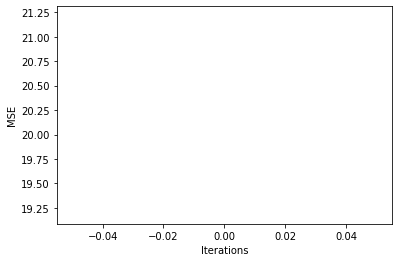

In [ ]:
num_iter = 20
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
#Repeat the two points above changing hyper-parameters (i.e., learning rate, number of iterations of SGD, number of latent factors, etc.) as needed to get good results
# (you can create multiple validation sets if you want, and run a bootstrap!)

In [ ]:
#Make predictions for the test dataset.
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.12 , 0.707, 0.757, ..., 1.282, 0.557, 1.699],
       [1.255, 0.771, 0.844, ..., 1.39 , 0.614, 1.87 ],
       [2.419, 1.613, 1.648, ..., 2.957, 1.244, 3.809],
       ...,
       [1.095, 0.649, 0.733, ..., 1.162, 0.524, 1.594],
       [1.167, 0.837, 0.804, ..., 1.555, 0.628, 1.932],
       [1.859, 1.123, 1.248, ..., 2.019, 0.9  , 2.74 ]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.119825617767136)","(8.79, 0.7068256039896639)","(-9.66, 0.7566036370548117)","(-8.16, -0.59574557316625)","(-7.52, 0.7408890830126349)","(-8.5, 1.9323142337853476)","(-9.85, 0.02028956331963541)","(4.17, -0.3177970488436511)","(-8.98, -0.011439864388012885)","(-4.76, 1.390788653991299)",...,"(2.82, 2.087653965635203)","(nan, 1.5138416790462412)","(nan, 2.4838802594311145)","(nan, 1.3751952742565294)","(nan, 1.2953015287919214)","(nan, 1.7134461171652693)","(-5.63, 1.79030261585509)","(nan, 1.2822467755485958)","(nan, 0.5567696870828703)","(nan, 1.6994370919497626)"
1,"(4.08, 1.2547162077487128)","(-0.29, 0.7707608409426425)","(6.36, 0.8444402748506152)","(4.37, -0.6549223543346016)","(-2.38, 0.8067007575923744)","(-9.66, 2.188313140880136)","(-0.73, 0.020481555334198348)","(-5.34, -0.366175326814185)","(8.88, 0.0011985854079332844)","(9.22, 1.5558885043133188)",...,"(2.82, 2.3474691060783135)","(-4.95, 1.6956796697116996)","(-0.29, 2.748035959464842)","(7.86, 1.5527303729419217)","(-0.19, 1.440205782372498)","(-2.14, 1.9072312008405237)","(3.06, 1.9986774083512957)","(0.34, 1.390425916405465)","(-4.32, 0.6136290718717264)","(1.07, 1.869951862249611)"
2,"(nan, 2.4186181916310456)","(nan, 1.6127064441450332)","(nan, 1.6475279176449034)","(nan, -1.3377917395200332)","(9.03, 1.6953171898587422)","(9.27, 4.079103445315409)","(9.03, 0.0529642564801921)","(9.27, -0.6453908197504047)","(nan, -0.08161048606491987)","(nan, 3.0137140620420513)",...,"(nan, 4.475079880107021)","(nan, 3.271709438228434)","(nan, 5.506996220415471)","(9.08, 2.9219265382126993)","(nan, 2.842772377905016)","(nan, 3.751926963131378)","(nan, 3.8962773765083245)","(nan, 2.957285066643488)","(nan, 1.243958998842105)","(nan, 3.8092896332707253)"
3,"(nan, 1.35328162571835)","(8.35, 0.8615269246057304)","(nan, 0.9154803718169474)","(nan, -0.7243029799185318)","(1.8, 0.9034631014004604)","(8.16, 2.327104646992739)","(-2.82, 0.025299497506319497)","(6.21, -0.38055230788389793)","(nan, -0.01867984611241726)","(1.84, 1.6815755033584854)",...,"(nan, 2.5199884129751733)","(nan, 1.8296185285776996)","(nan, 3.013846799721276)","(0.53, 1.6577733201673597)","(nan, 1.569192951370549)","(nan, 2.075025619026027)","(nan, 2.16605795265131)","(nan, 1.5655928328688653)","(nan, 0.67637805498106)","(nan, 2.0655719669067714)"
4,"(8.5, 1.8059652383954108)","(4.61, 1.174146656317572)","(-4.17, 1.2255194478704754)","(-5.39, -0.9810870046705921)","(1.36, 1.2326762268453917)","(1.6, 3.078767002204086)","(7.04, 0.0363569174189917)","(4.61, -0.49621692891463404)","(-0.44, -0.041076629503087624)","(5.73, 2.246875729908894)",...,"(5.19, 3.3533328908855835)","(5.58, 2.4422334323238557)","(4.27, 4.062377297494227)","(5.19, 2.1986209939571344)","(5.73, 2.1069160327474012)","(1.55, 2.7836675639098365)","(3.11, 2.8990082069979417)","(6.55, 2.142610585498238)","(1.8, 0.9143916962406564)","(1.6, 2.7959169561041355)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 2.356358949263963)","(7.43, 1.5140153916832602)","(9.08, 1.596216608878376)","(2.33, -1.2694237019812165)","(3.2, 1.5884958850648851)","(6.75, 4.036756137106922)","(-8.79, 0.04552898329392257)","(-0.53, -0.656002092758137)","(-8.74, -0.041718646387627255)","(7.23, 2.929584119093168)",...,"(8.83, 4.382378393926722)","(-1.21, 3.1861030063067504)","(9.22, 5.270750282464606)","(-6.7, 2.878751494718865)","(8.45, 2.7396033537797324)","(9.03, 3.621344151057787)","(6.55, 3.7763543567520514)","(8.69, 2.7563902291591074)","(8.79, 1.1844166018698312)","(7.43, 3.61903877591473)"
24979,"(9.13, 0.6558747232714058)","(-8.16, 0.47833876875165987)","(8.59, 0.4531566173663513)","(9.08, -0.38711524650962836)","(0.87, 0.5050469696494575)","(-8.93, 1.061222584641563)","(-3.5, 0.01871763528638144)","(5.78, -0.15548913436137304)","(-8.11, -0.04923570366933041)","(4.9, 0.8219505421156876)",...,"(-1.17, 1.1974071019502486)","(-5.73, 0.888208778073

In [ ]:

#In the jokes dataset, what's the rating that user 22189 has given to joke 4?
df.iloc[22189, 4]

3.98

In [161]:
xls='/content/movies_latent_factors.xlsx'
movies =pd.read_excel(xls, 'Items')
users= pd.read_excel(xls, 'Users')

In [162]:
movies

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9806,The Incredibles (2004),0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,10020,Beauty and the Beast (1991),1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,36657,X-Men (2000),0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,36658,X2: X-Men United (2003),1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [163]:
#In the movies dataset, what's the value of Factor13 for the movie with ID=453?
MV453= movies[movies['Movie ID'] == 453]
MV453

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
39,453,A Beautiful Mind (2001),-1.718302,-0.626027,-2.113008,-0.234649,1.07486,-0.368105,-0.31073,0.156776,-0.951447,-0.213479,0.366553,0.050671,-0.080249,-0.224858,0.078898


In [164]:
#In the movies dataset, which of the following IDs corresponds to the movie with the lowest loading of factor 10?
factor10 = movies['Factor10']
factor10.idxmin()

47

In [165]:
#In the movies dataset, predict the rating that the user with ID 5323 will give to the movie with ID 745. Give your answer with two decimal values (e.g., 0.12)


us= users[users['User']== 5323]
us = us.drop(columns=['User'])
mv= movies[movies['Movie ID']== 745]
mv= mv.drop(columns=['Movie ID','Title'])
print(mv)
predictions = us.dot(mv.T)
predictions

     Factor1  Factor2   Factor3   Factor4  Factor5   Factor6   Factor7  \
60 -0.839545 -0.05904 -1.176596 -0.275984 -0.19434 -0.326744 -0.661091   

     Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  \
60 -0.145326  0.112017  0.052854  0.504873  0.070924 -0.045207 -1.018641   

    Factor15  
60  0.692908  


,60
2,-0.086112


In [166]:
#In the movies dataset, predict the rating that the user with ID 174 will give to the movie with ID 107. Give your answer with two decimal values (e.g., 0.12).
us= users[users['User']== 174]
us = us.drop(columns=['User'])
mv= movies[movies['Movie ID']== 107]
mv= mv.drop(columns=['Movie ID','Title'])
print(mv)
predictions = us.dot(mv.T)
predictions

    Factor1   Factor2   Factor3   Factor4   Factor5  Factor6   Factor7  \
12  -0.7155  1.526159  0.413283 -0.357325  0.158229  0.17635  0.104279   

     Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  \
12 -0.618841 -0.379268  0.425182  0.351452  0.234972  0.790661 -0.052538   

    Factor15  
12 -0.441463  


,12
3,-0.052166


In [184]:
#In the movies dataset, if you had to recommend 3 movies to the user with ID=3947, which ones would you choose?
us= users[users['User']== 3947]
us = us.drop(columns=['User'])
mv= movies.drop(columns=['Movie ID','Title'])
predictions = mv.dot(us.T)
predictions.sort_values(by=[17],ascending=False)

,17
50,0.582245
51,0.578413
39,0.431327
20,0.314619
83,0.313001
...,...
86,-0.342341
24,-0.524426
59,-0.614693
36,-2.224573


In [188]:
x= movies.iloc[[50]]
x

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
50,603,The Matrix (1999),-3.063639,-1.319283,-0.043618,-0.994612,-0.954054,0.190838,0.197918,-0.093962,-1.08284,-0.003843,1.377453,-1.668189,-1.348377,0.223797,0.752413
